This notebook has been created by Katie Fallon as part of coursework for 3831 Data Imputation


I have attempted to replicate, on a much smaller scale, the experiments described in this paper:

Article: Jäger, Sebastian, Arndt Allhorn, and Felix Bießmann. ‘A Benchmark for Data Imputation Methods’. Frontiers in Big Data 4 (2021): 48. https://doi.org/10.3389/fdata.2021.693674


The experiment compares the Simple Imputer, KNN and MICE Imputation methods on data Missing at Random, Missing Completely at Random and data Missing Not at Random.

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import missingno as msno ## specific python lib to analyse missingness
import matplotlib as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
import numpy as np

In [ ]:
#Load in the 9 corrupted dataframes
#Missing at random
MAR1 = pd.read_csv("https://raw.githubusercontent.com/PaoloMissier/CSC3831-2021-22/main/IMPUTATION/TARGET-DATASETS/CORRUPTED/HOUSES/houses_0.01_MAR.csv", na_values=['N/A'], index_col=0)
MAR2 = pd.read_csv("https://raw.githubusercontent.com/PaoloMissier/CSC3831-2021-22/main/IMPUTATION/TARGET-DATASETS/CORRUPTED/HOUSES/houses_0.1_MAR.csv", na_values=['N/A'], index_col=0)
MAR3 = pd.read_csv("https://raw.githubusercontent.com/PaoloMissier/CSC3831-2021-22/main/IMPUTATION/TARGET-DATASETS/CORRUPTED/HOUSES/houses_0.5_MAR.csv", na_values=['N/A'], index_col=0)

#Missing completely at random
MCAR1 = pd.read_csv("https://raw.githubusercontent.com/PaoloMissier/CSC3831-2021-22/main/IMPUTATION/TARGET-DATASETS/CORRUPTED/HOUSES/houses_0.01_MCAR.csv", na_values=['N/A'], index_col=0)
MCAR2 = pd.read_csv("https://raw.githubusercontent.com/PaoloMissier/CSC3831-2021-22/main/IMPUTATION/TARGET-DATASETS/CORRUPTED/HOUSES/houses_0.1_MCAR.csv", na_values=['N/A'], index_col=0)
MCAR3 = pd.read_csv("https://raw.githubusercontent.com/PaoloMissier/CSC3831-2021-22/main/IMPUTATION/TARGET-DATASETS/CORRUPTED/HOUSES/houses_0.5_MCAR.csv", na_values=['N/A'], index_col=0)

#Missing not at random
MNAR1 = pd.read_csv("https://raw.githubusercontent.com/PaoloMissier/CSC3831-2021-22/main/IMPUTATION/TARGET-DATASETS/CORRUPTED/HOUSES/houses_0.01_MNAR.csv", na_values=['N/A'], index_col=0)
MNAR2 = pd.read_csv("https://raw.githubusercontent.com/PaoloMissier/CSC3831-2021-22/main/IMPUTATION/TARGET-DATASETS/CORRUPTED/HOUSES/houses_0.1_MNAR.csv", na_values=['N/A'], index_col=0)
MNAR3 = pd.read_csv("https://raw.githubusercontent.com/PaoloMissier/CSC3831-2021-22/main/IMPUTATION/TARGET-DATASETS/CORRUPTED/HOUSES/houses_0.5_MNAR.csv", na_values=['N/A'],index_col=0)

datasets = [MAR1,MAR2,MAR3,MCAR1,MCAR2,MCAR3,MNAR1,MNAR2,MNAR3]

In [ ]:
MAR1.head()

,median_house_value,median_income,housing_median_age,total_rooms,total_bedrooms,population,households,latitude,longitude
0,452600.0,8.3252,41.0,880.0,129.0,322.0,126.0,37.88,-122.23
1,358500.0,8.3014,21.0,7099.0,1106.0,2401.0,1138.0,37.86,-122.22
2,352100.0,7.2574,52.0,1467.0,190.0,496.0,177.0,37.85,-122.24
3,341300.0,5.6431,52.0,1274.0,235.0,558.0,219.0,37.85,-122.25
4,342200.0,3.8462,52.0,1627.0,280.0,565.0,259.0,37.85,-122.25


In [ ]:
#Used to calculate the number of missing values within each dataframe
MNAR3.isnull().sum()

median_house_value        0
median_income         10320
housing_median_age    10320
total_rooms               0
total_bedrooms            0
population            10320
households                0
latitude                  0
longitude                 0
dtype: int64

**Number of null values within the corrupted dataframes:**
Missing values in median_income, housing_median_age and population columns
**Missing At Random**
* **MAR1**- 206
* **MAR2**- 2064
* **MAR3**- 10320

**Missing Completely At Random**
* **MCAR1**- 206
* **MCAR2**- 2064
* **MCAR3**- 10320

**Missing Not At Random**
* **MNAR1**- 206
* **MNAR2**- 2064
* **MNAR1**- 10320

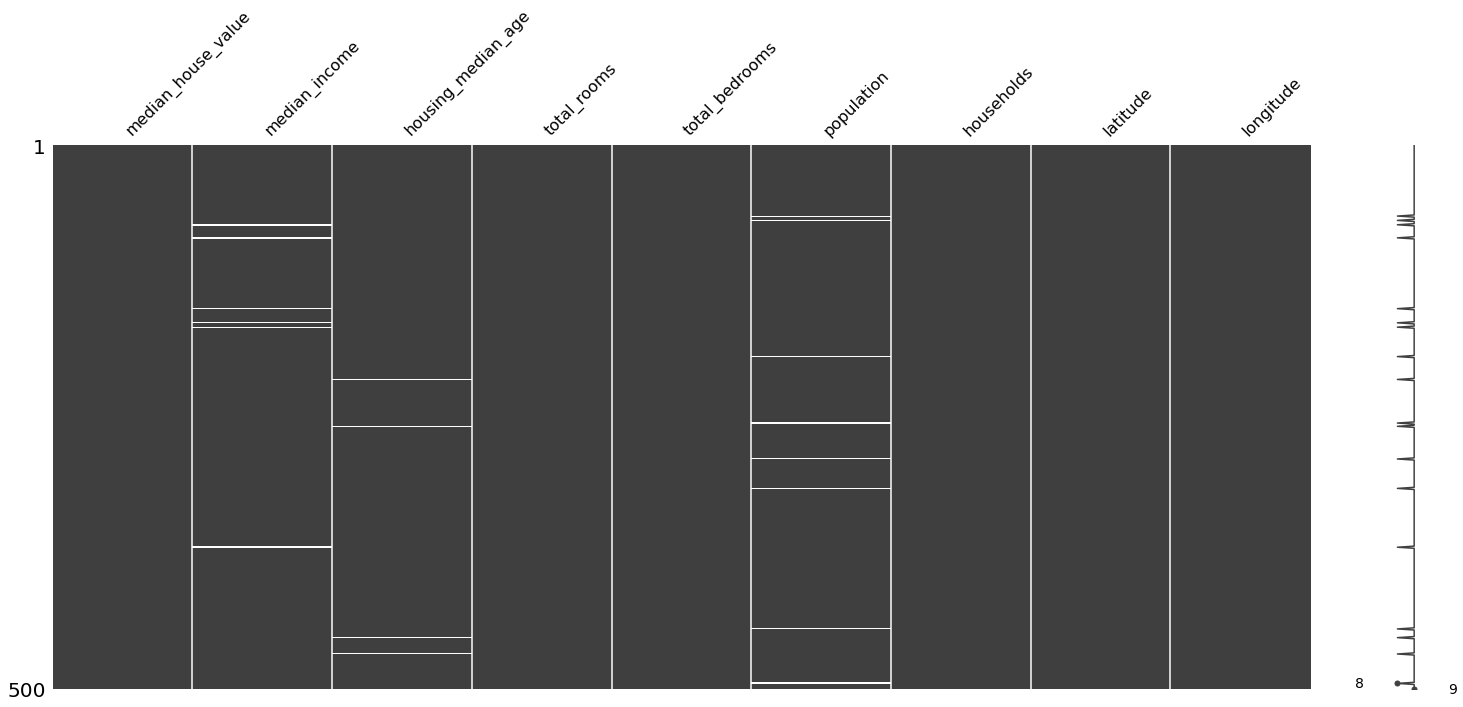

In [ ]:
#Take a sample of the data and display missingness
%matplotlib inline
msno.matrix(MAR1.sample(500, random_state=32))

# 2.1 apply the three methods you have learned in class to each of the variations. This will result in 27 new datasets with imputed data.

Method 1: Simple Imputer

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

simp = []
for df in datasets:
    imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
    imputer.fit(df)
    imputed_df = imputer.transform(df)
    imputed_df = pd.DataFrame(imputed_df, columns=df.columns)
    simp.append(imputed_df)

Method 2: MICE

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

mimp = []
for df in datasets:
    imputer = IterativeImputer(missing_values=np.nan, add_indicator=False,
                               random_state=0, n_nearest_features=5,
                               sample_posterior=True)
    imputer.fit(df)
    imputed_df = imputer.transform(df)
    imputed_df = pd.DataFrame(imputed_df, columns=df.columns)
    mimp.append(imputed_df)

Method 3: KKN

In [ ]:
from sklearn.impute import KNNImputer
knnimp = []
for df in datasets:
    imputer= KNNImputer(n_neighbors=2)
    imputer.fit(df)
    imputed_df = imputer.transform(df)
    imputed_df = pd.DataFrame(imputed_df, columns=df.columns)
    knnimp.append(imputed_df)

# 2.2 and 2.3 use each of these to address the corresponding task: Using regression to predict median house value

# compare the effectiveness of each imputation method on each of the variation datasets, using the regression performance (RMSE) as a metric.

Step 1: Finding a Correlation

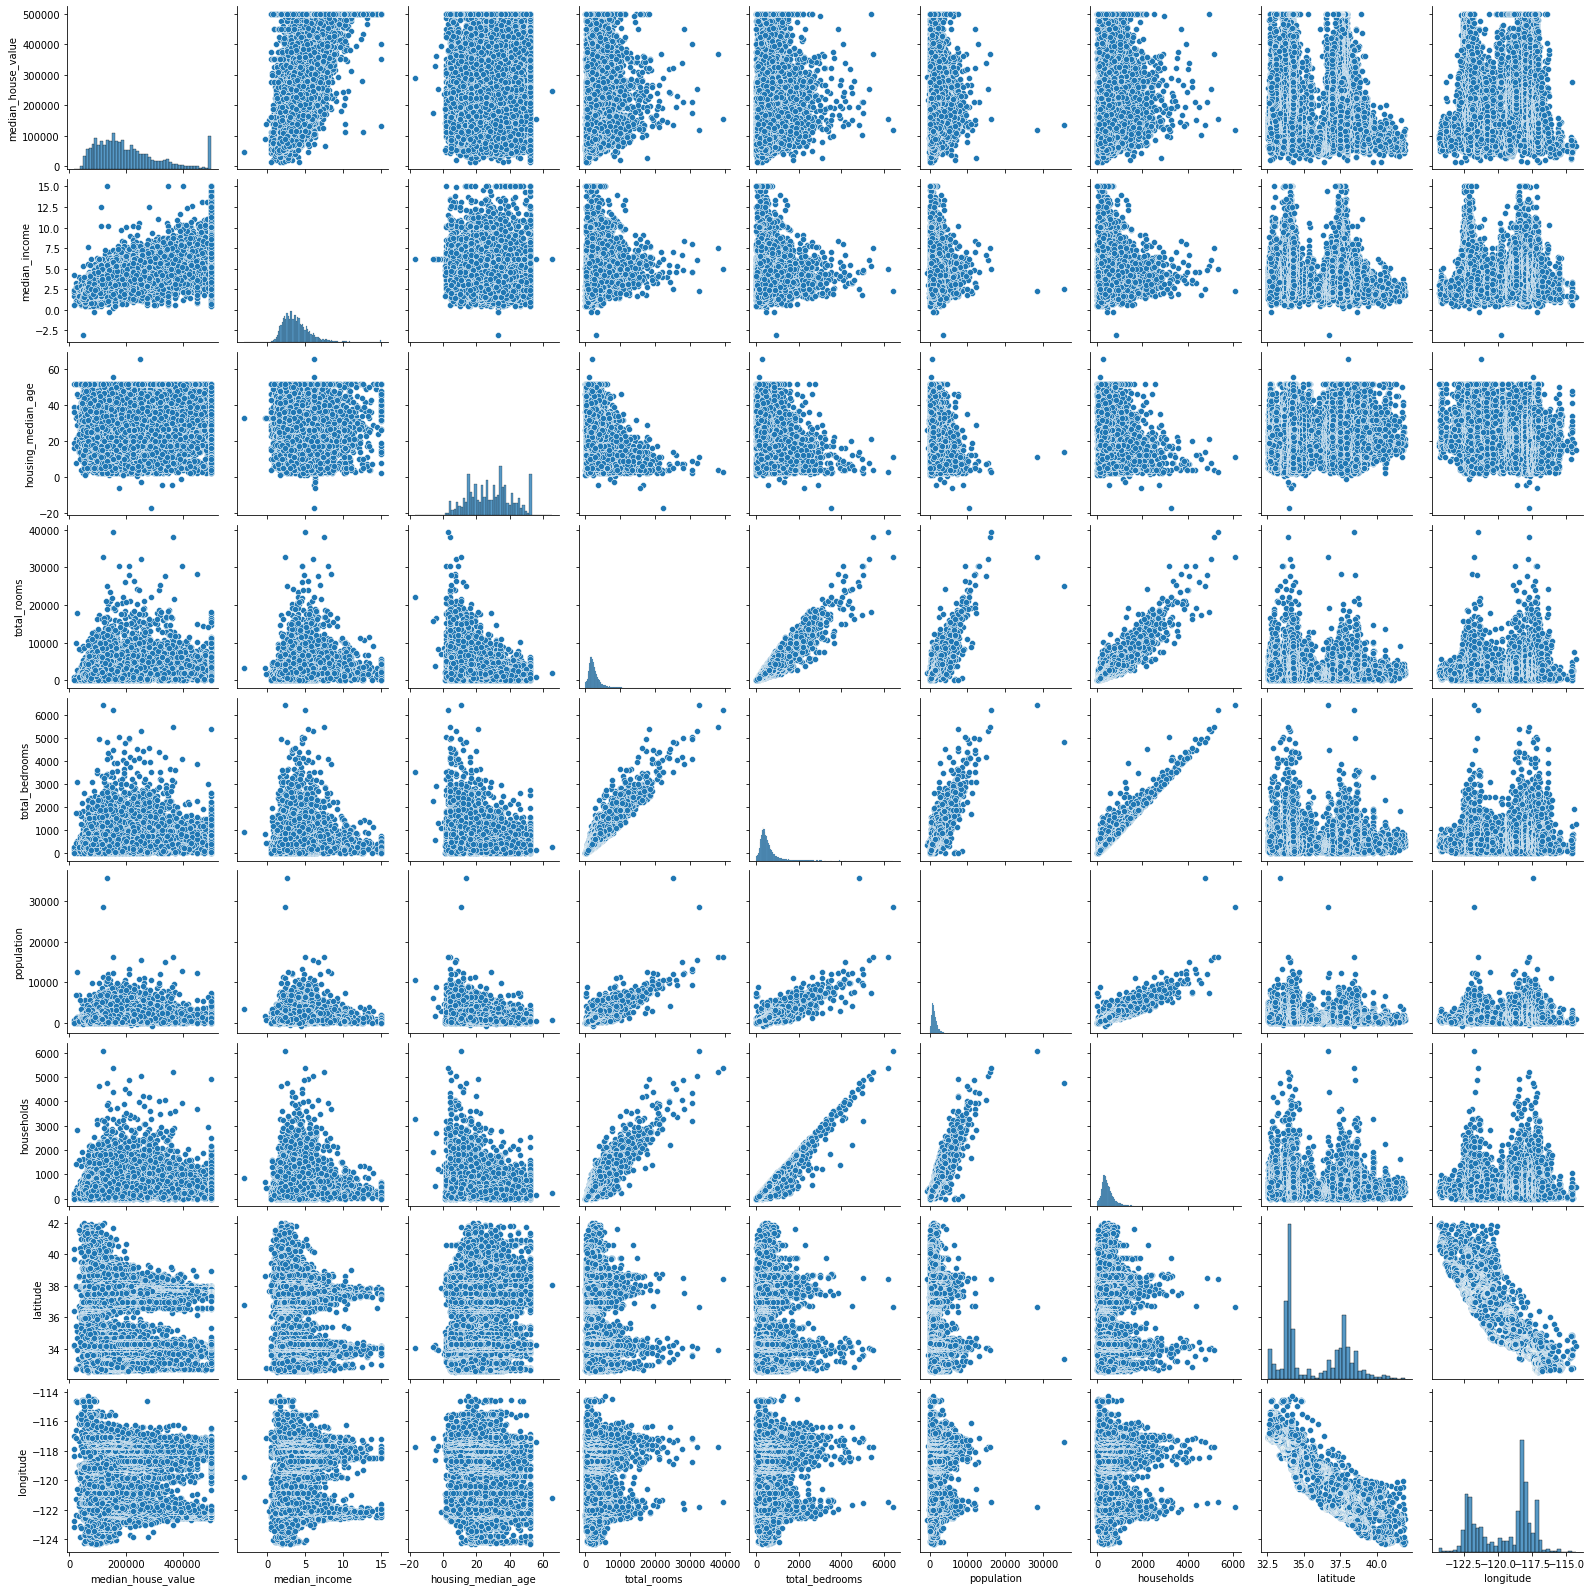

In [ ]:
#Try to find correlation between values
import seaborn as sns
import matplotlib.pyplot as plt

df = mimp[0]
cols = df.columns
sns.pairplot(df[cols])
plt.show()

There is a positive correlation between median house value and median income.

In [ ]:
correlation = df[cols].corr()
correlation

,median_house_value,median_income,housing_median_age,total_rooms,total_bedrooms,population,households,latitude,longitude
median_house_value,1.000000,0.688181,0.103280,0.134153,0.050594,-0.024114,0.065843,-0.144160,-0.045967
median_income,0.688181,1.000000,-0.118368,0.197950,-0.008225,0.005114,0.012778,-0.080781,-0.013749
housing_median_age,0.103280,-0.118368,1.000000,-0.361857,-0.321237,-0.297173,-0.303715,0.010279,-0.106566
total_rooms,0.134153,0.197950,-0.361857,1.000000,0.929893,0.856520,0.918484,-0.036100,0.044568
total_bedrooms,0.050594,-0.008225,-0.321237,0.929893,1.000000,0.877336,0.979829,-0.066318,0.068378
population,-0.024114,0.005114,-0.297173,0.856520,0.877336,1.000000,0.906532,-0.109216,0.100279
households,0.065843,0.012778,-0.303715,0.918484,0.979829,0.906532,1.000000,-0.071035,0.055310
latitude,-0.144160,-0.080781,0.010279,-0.036100,-0.066318,-0.109216,-0.071035,1.000000,-0.924664
longitude,-0.045967,-0.013749,-0.106566,0.044568,0.068378,0.100279,0.055310,-0.924664,1.000000


Step 2: Building a regression model

1. Linear Regression Model

Returns a large RMSE for all imputation methods.This can be improved upon.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import math

def linear_mod(arr):
  rmse_arr = []
  for df in arr:
      model = linear_model.LinearRegression()
      Y_col = 'median_house_value'
      X_cols = df.loc[:, df.columns != Y_col].columns
      X_train, X_test, y_train, y_test = train_test_split(df[X_cols], df[Y_col],test_size=0.1, random_state=0)
      model.fit(X_train,y_train)
      predictions = model.predict(X_test)
      rmse = math.sqrt(mean_squared_error(y_test, predictions))
      rmse_arr.append(rmse)
  return rmse_arr

In [ ]:
#Simple
simp_lin_rmse = linear_mod(simp)
print("simple")
av_lin_simple = np.average(simp_lin_rmse)
print(av_lin_simple)
#MICE
mice_lin_rmse = linear_mod(mimp)
print("mice")
av_lin_mice = np.average(mice_lin_rmse)
print(av_lin_mice)
#KNN
knn_lin_rmse = linear_mod(knnimp)
av_lin_knn = np.average(knn_lin_rmse)
print("knn")
print(av_lin_knn)

simple
75580.2473379195
mice
71887.25926479585
knn
68457.09153616294


2. Gradient Boosting

Returns a RMSE score 1000 lower than when using Linear Model. This can still be improved.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import math

def gbmodel(arr):
  rmse_arr = []
  for df in arr:
      model = GradientBoostingRegressor()
      Y_col = 'median_house_value'
      X_cols = df.loc[:, df.columns != Y_col].columns
      X_train, X_test, y_train, y_test = train_test_split(df[X_cols], df[Y_col],test_size=0.1, random_state=0)
      model.fit(X_train,y_train)
      predictions = model.predict(X_test)
      rmse = math.sqrt(mean_squared_error(y_test, predictions))
      rmse_arr.append(rmse)
  return rmse_arr

In [ ]:
#Simple
simp_gb_rmse = gbmodel(simp)
print("simple")
av_gb_simple = np.average(simp_gb_rmse)
print(av_gb_simple)
#MICE
mice_gb_rmse = gbmodel(mimp)
print("mice")
av_gb_mice = np.average(mice_gb_rmse)
print(av_gb_mice)
#KNN
knn_gb_rmse = gbmodel(knnimp)
av_gb_knn = np.average(knn_gb_rmse)
print("knn")
print(av_gb_knn)

simple
57077.84439452276
mice
56123.07125509078
knn
54019.61437993991


3. Random Forest

Lowest RMSE score of all three regression models. Therefore, this model was selected for use throughout the rest of this assignment.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

def rfmodel(arr):
  rmse_arr = []
  for df in arr:
      model = RandomForestRegressor(n_estimators = 100, random_state = 42)
      Y_col = 'median_house_value'
      X_cols = df.loc[:, df.columns != Y_col].columns
      X_train, X_test, y_train, y_test = train_test_split(df[X_cols], df[Y_col],test_size=0.1, random_state=0)
      model.fit(X_train,y_train)
      predictions = model.predict(X_test)
      rmse = math.sqrt(mean_squared_error(y_test, predictions))
      #print(rmse)
      rmse_arr.append(rmse)
  return rmse_arr

In [ ]:
#Simple
print("simple")
simp_rf_rmse = rfmodel(simp)
av_rf_simple = np.average(simp_rf_rmse)
print("av")
print(av_rf_simple)
#MICE
print("mice")
mice_rf_rmse = rfmodel(mimp)
av_rf_mice = np.average(mice_rf_rmse)
print("av")
print(av_rf_mice)
#KNN
print("knn")
knn_rf_rmse = rfmodel(knnimp)
av_rf_knn = np.average(knn_rf_rmse)
print("av")
print(av_rf_knn)

simple
av
47172.06428711167
mice
av
47905.407279911014
knn
av
47372.55167491485


In [ ]:
print(av_rf_simple)

47172.06428711167


# 2.4 You are also given the uncorrupted (original)_ housing dataset. Use this to train a regression model and use its performance as baseline against which the others are compared.

In [ ]:
#Load in the uncorrupted original dataset
or_arr = []
original = pd.read_csv('https://raw.githubusercontent.com/PaoloMissier/CSC3831-2021-22/main/IMPUTATION/TARGET-DATASETS/ORIGINAL/houses.csv')
or_arr.append(original)
original.head()

,median_house_value,median_income,housing_median_age,total_rooms,total_bedrooms,population,households,latitude,longitude
0,452600.0,8.3252,41.0,880.0,129.0,322.0,126.0,37.88,-122.23
1,358500.0,8.3014,21.0,7099.0,1106.0,2401.0,1138.0,37.86,-122.22
2,352100.0,7.2574,52.0,1467.0,190.0,496.0,177.0,37.85,-122.24
3,341300.0,5.6431,52.0,1274.0,235.0,558.0,219.0,37.85,-122.25
4,342200.0,3.8462,52.0,1627.0,280.0,565.0,259.0,37.85,-122.25


In [ ]:
#Train Random Forest Model using the original dataset
o_rf_rmse = rfmodel(or_arr)
o_rf_rmse = o_rf_rmse[0]
print("random forest: " + str(o_rf_rmse))


random forest: 47391.49129754855


# 2.5 report your notes and observations.

In [ ]:
#@title
#add original rmse score to array for comparison
yv = knn_rf_rmse
yv.insert(0, o_rf_rmse)
print(knn_rf_rmse)
print(yv)

[47391.49129754855, 47186.81060772726, 47790.51538589169, 45539.788738053496, 47477.84195861933, 47654.12768227534, 49314.09432510716, 46980.46395051511, 47306.32035876706, 47103.00206727715]
[47391.49129754855, 47186.81060772726, 47790.51538589169, 45539.788738053496, 47477.84195861933, 47654.12768227534, 49314.09432510716, 46980.46395051511, 47306.32035876706, 47103.00206727715]


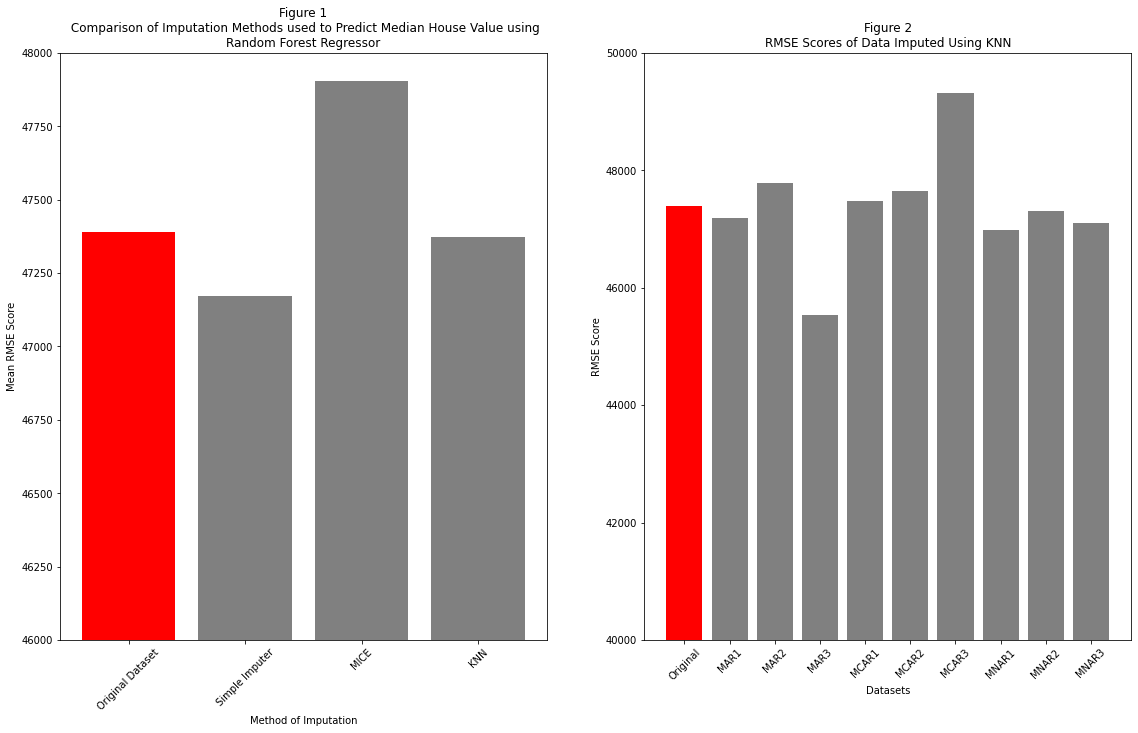

In [ ]:
#@title
#Plot graph
plt.figure(figsize=(1920/100, 1080/100))
plt.subplot(1,2,1)
x_axis = ["Original Dataset","Simple Imputer", "MICE", "KNN"]
y_axis = [o_rf_rmse, av_rf_simple, av_rf_mice, av_rf_knn]
clrs = ['red' if (x == y_axis[0]) else 'grey' for x in y_axis]
plt.bar(x_axis, y_axis, color=clrs)
plt.xticks(rotation=45)
plt.title("Figure 1" + '\n' +" Comparison of Imputation Methods used to Predict Median House Value using" + '\n' + "Random Forest Regressor")
plt.ylabel("Mean RMSE Score")
plt.xlabel("Method of Imputation")
plt.ylim(46000,48000)

plt.subplot(1,2,2)
y_axis = yv
x_axis= ["Original","MAR1","MAR2","MAR3","MCAR1","MCAR2","MCAR3","MNAR1","MNAR2","MNAR3"]
clrs = ['red' if (x == y_axis[0]) else 'grey' for x in y_axis]
plt.bar(x_axis, y_axis, color=clrs)
plt.ylim(40000,50000)
plt.xticks(rotation=45)
plt.title("Figure 2" + '\n' +"RMSE Scores of Data Imputed Using KNN")
plt.ylabel("RMSE Score")
plt.xlabel("Datasets")

plt.show()


Comparison of the mean RMSE score (Figure 1) shows the KNN Imputation method to appear closest to the RMSE score of the original Dataset when using a random forest regression model to predict median house value. This is followed by the Simple Imputer, which was slightly lower when compared to the original dataset. The worst imputation method appears to be MICE.

When looking at the RMSE scores for datasets imputed using the KNN Imputer (Figure 2), this appears to perform best on datasets with only 206 missing values (MAR1, MCAR1 and MNAR1) and worst on data with 10320 missing values (MAR3, MCAR3). It performs most consistently on data Missing Not at Random, meaning there is a reason for the data to be missing.

**Calculating the difference in RMSE Scores**

---



In [ ]:
#@title
#Remove original dataset from array
index = 0
yv.pop(index)
print(yv)

[47186.81060772726, 47790.51538589169, 45539.788738053496, 47477.84195861933, 47654.12768227534, 49314.09432510716, 46980.46395051511, 47306.32035876706, 47103.00206727715]


In [ ]:
#@title
#Calculating the difference in RMSE scores for KNN imputation
from statistics import mean
rmse_knn_diff = []
abs_diff = []
for val in knn_rf_rmse:
  difference = round(o_rf_rmse - val,2)
  a_diff = round(abs(o_rf_rmse - val),2)
  abs_diff.append(a_diff)
  rmse_knn_diff.append(difference)
print(rmse_knn_diff)
av_knn_diff = mean(abs_diff)

[204.68, -399.02, 1851.7, -86.35, -262.64, -1922.6, 411.03, 85.17, 288.49]


In [ ]:
#@title
#Calculating the difference in RMSE scores for Simple imputer
rmse_simp_diff = []
abs_diff = []
for val in simp_rf_rmse:
  difference = round(o_rf_rmse - val,2)
  a_diff = round(abs(o_rf_rmse - val),2)
  abs_diff.append(a_diff)
  rmse_simp_diff.append(difference)
print(rmse_simp_diff)
av_simp_diff = mean(abs_diff)

[212.93, 1455.33, -110.77, 106.07, 74.47, -2221.74, 447.33, 475.53, 1535.71]


In [ ]:
#@title
#Calculating the difference in RMSE scores for MICE imputation
rmse_mice_diff = []
abs_diff = []
for val in mice_rf_rmse:
  difference = round(o_rf_rmse - val,2)
  a_diff = round(abs(o_rf_rmse - val),2)
  abs_diff.append(a_diff)
  rmse_mice_diff.append(difference)
print(rmse_mice_diff)
av_mice_diff = mean(abs_diff)

[-15.42, 845.55, 501.79, 16.19, -221.99, -6462.81, 411.98, -213.56, 513.02]


In [ ]:
#@title
ds_names = ["MAR1","MAR2","MAR3","MCAR1","MCAR2","MCAR3","MNAR1","MNAR2","MNAR3"]
data = {
        'Simple Imputer Difference': rmse_simp_diff,
        'MICE Imputer Difference': rmse_mice_diff,
        'KNN Imputer Difference': rmse_knn_diff,
        }
differenceDF = pd.DataFrame(data, index=ds_names)
#differenceDF = differenceDF.set_index('Dataset')
differenceDF

,Simple Imputer Difference,MICE Imputer Difference,KNN Imputer Difference
MAR1,212.93,-15.42,204.68
MAR2,1455.33,845.55,-399.02
MAR3,-110.77,501.79,1851.70
MCAR1,106.07,16.19,-86.35
MCAR2,74.47,-221.99,-262.64
MCAR3,-2221.74,-6462.81,-1922.60
MNAR1,447.33,411.98,411.03
MNAR2,475.53,-213.56,85.17
MNAR3,1535.71,513.02,288.49


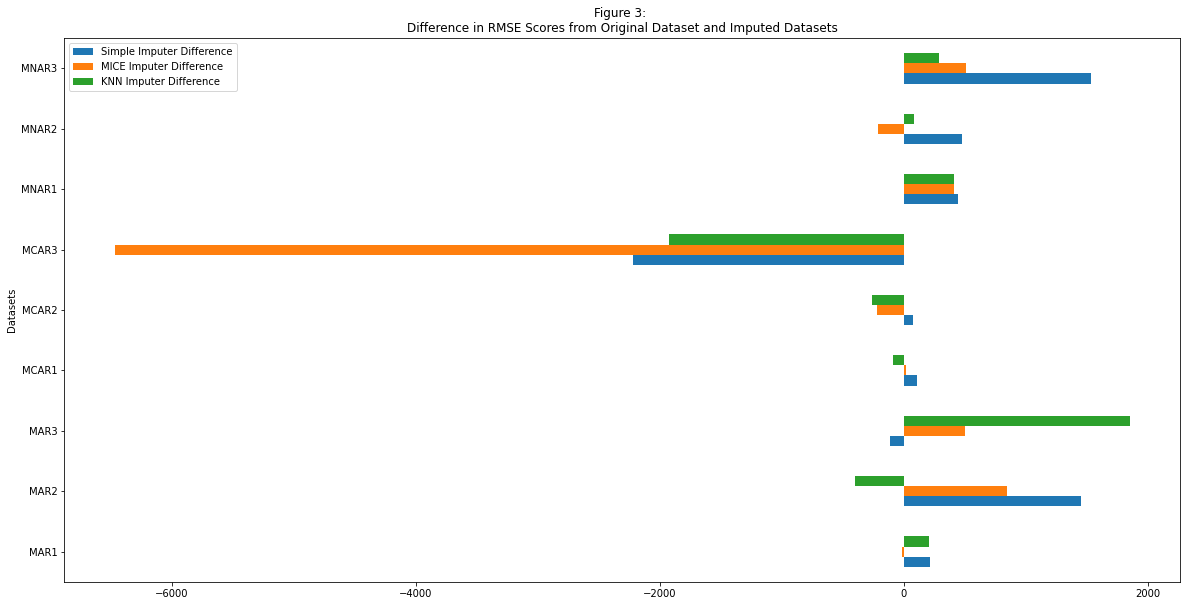

In [ ]:
#@title
differenceDF.plot(kind="barh", figsize=(2000/100, 1000/100), xlabel="Datasets",
                  ylabel="Difference from Original Dataset (RMSE)",
                  title="Figure 3: " + '\n' + "Difference in RMSE Scores from Original Dataset and Imputed Datasets"
                  )

In [ ]:
#@title
print("Mean Difference in RMSE Score from Original Dataset: " + '\n' + "Simple: " + str(av_simp_diff) + "\n" + "MICE: " +  str(av_mice_diff) + "\n" + "KNN: " + str(av_knn_diff))

Mean Difference in RMSE Score from Original Dataset: 
Simple: 737.7644444444444
MICE: 1022.478888888889
KNN: 612.4088888888889


Figure 3 demonstrates that MICE appears to perform better on datasets with data Missing At Random, where as KNN appears to perform better on datasets Missing Not at Random and Missing Completely At Random.
The Simple Imputer performs well when imputing a low number of missing values.
Therefore, the type of missingness will impact your decision on which imputation method to use. Overall, the KNN imputation method seems the most appropriate when a combination of MAR, MNAR and MCAR is present and returns a mean RMSE score closest to the original dataset when triained using a random forest regression model.